In the great book [An Introduction to Statistical Learning with Applications in R](http://faculty.marshall.usc.edu/gareth-james/ISL/) - the following quote is said: "As a general rule, parametric methods will tend to out perform non-parametric approaches when there is a small number of observations per predictor."

I am going to test this theory out. 

First I am going to make a dataset 

In [47]:
from sklearn.datasets import make_regression
import pandas as pd
import matplotlib.pyplot as plt 

In [147]:
X, y = make_regression(n_features = 1, noise=50, bias = 5, random_state=11)

In [151]:
df = pd.DataFrame(X)
df['Y'] = y 

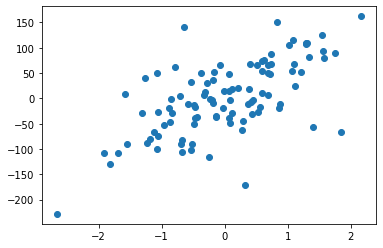

In [152]:
plt.scatter(df[0], df['Y'])

We see that with a single feature the data has a linear relationship but it is not a strong linear relationship. I am going to try Linear Regression and KNN Regression when using 1, 2, 3, 4, 10, and 20 features.   

In [153]:
lr_mse = []
knn_mse = {}
for p in [1, 2, 3, 4, 10, 20]:
    X, y = make_regression(n_features = p, noise=50, bias = 5, random_state=11)
    df = pd.DataFrame(X)
    df['Y'] = y
    lr = LinearRegression()
    lr.fit(df.drop('Y', axis = 1), df['Y'])
    lr_mse.append(mean_squared_error(df['Y'], lr.predict(df.drop('Y', axis = 1))))
    
    knn = []
    for i in range(2, 11):
        kn = KNeighborsRegressor(n_neighbors=i)
        kn.fit(df.drop('Y', axis = 1), df['Y'])
        knn.append(mean_squared_error(df['Y'], kn.predict(df.drop('Y', axis = 1))))
    knn_mse[p] = knn

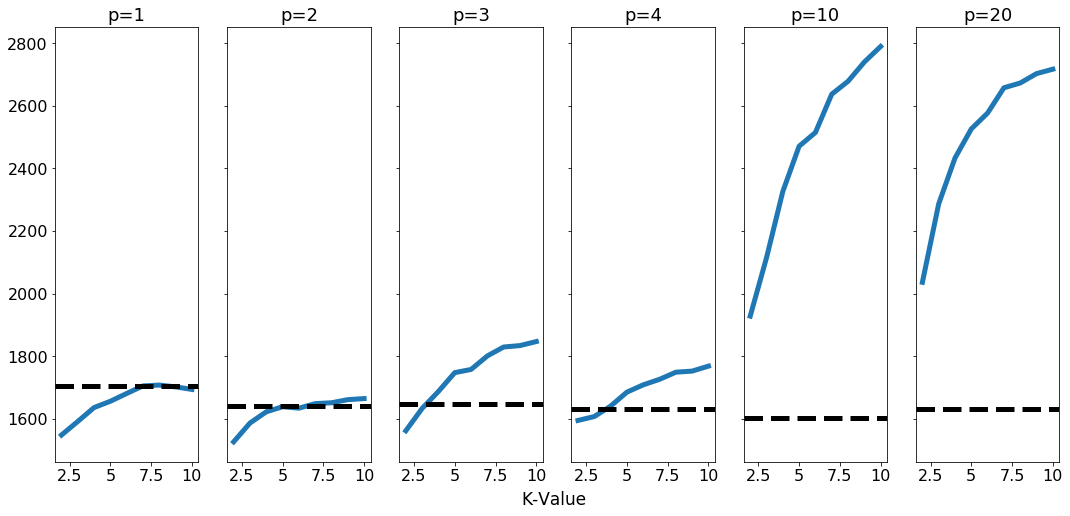

In [154]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=1, ncols = 6, sharey=True, figsize = (18, 8))

ax1.plot(range(2, 11), knn_mse[1], lw = 5)
ax1.axhline(lr_mse[0], color = 'k', lw = 5, ls = '--')
ax1.set_title('p=1', fontsize = 18)
ax1.set_yticklabels([1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000], fontsize = 16)
ax1.set_xticklabels([0, 2.5, 5, 7.5, 10], fontsize = 16)

ax2.plot(range(2, 11), knn_mse[2], lw = 5)
ax2.axhline(lr_mse[1], color = 'k', lw = 5, ls = '--')
ax2.set_title('p=2', fontsize = 18)
ax2.set_xticklabels([0, 2.5, 5, 7.5, 10], fontsize = 16)

ax3.plot(range(2, 11), knn_mse[3], lw = 5)
ax3.axhline(lr_mse[2], color = 'k', lw = 5, ls = '--')
ax3.set_title('p=3', fontsize = 18)
ax3.set_xticklabels([0, 2.5, 5, 7.5, 10], fontsize = 16)

ax4.plot(range(2, 11), knn_mse[4], lw = 5)
ax4.axhline(lr_mse[3], color = 'k', lw = 5, ls = '--')
ax4.set_title('p=4', fontsize = 18)
ax4.set_xticklabels([0, 2.5, 5, 7.5, 10], fontsize = 16)

ax5.plot(range(2, 11), knn_mse[10], lw = 5)
ax5.axhline(lr_mse[4], color = 'k', lw = 5, ls = '--')
ax5.set_title('p=10', fontsize = 18)
ax5.set_xticklabels([0, 2.5, 5, 7.5, 10], fontsize = 16)

ax6.plot(range(2, 11), knn_mse[20], lw = 5)
ax6.axhline(lr_mse[5], color = 'k', lw = 5, ls = '--')
ax6.set_title('p=20', fontsize = 18)
ax6.set_xticklabels([0, 2.5, 5, 7.5, 10], fontsize = 16)

fig.text(0.51, 0.05, 'K-Value', ha='center', fontsize = 17);

The blue line is MSE for KNN Regression at different levels of K.  The black dotted line is the MSE for linear regression.  We see with lower values of K, KNN Regression outperforms linear regression (however there is a good chance it is overfitting).  We also see that as the number of features increases the parametric model (linear regression), outperforms the non-parametric model (KNN regression). 